In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [2]:
df_on=pd.read_csv('online_shoppers_intention.csv')
df_on.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df_on.shape

(12330, 18)

In [5]:
df_1=df_on.copy()

In [6]:
df_1.drop(['OperatingSystems','Browser'], 1,inplace=True)

In [7]:
df_1.shape

(12330, 16)

In [8]:
df_1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
cat=['Month','Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [10]:
for c in cat:
    df_1[c]=df_1[c].astype('object')

In [11]:
df_cat=df_1.select_dtypes('object')
df_cat.columns

Index(['Month', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [12]:
df_num = df_1.select_dtypes(include = [np.number])
df_num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [13]:
df_cat=df_1.select_dtypes('object')
df_cat.columns

Index(['Month', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [15]:
df_cat = df_1.select_dtypes(include = [np.object])
# display categorical features
df_cat.head()

,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,Feb,1,1,Returning_Visitor,False,False
1,Feb,1,2,Returning_Visitor,False,False
2,Feb,9,3,Returning_Visitor,False,False
3,Feb,2,4,Returning_Visitor,False,False
4,Feb,1,4,Returning_Visitor,True,False


In [16]:
encode= pd.get_dummies(data = df_cat, drop_first = True)

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit_transform(df_num)

array([[-0.99012808, -0.99665853, -0.52048939, ...,  1.98254697,
        -0.52940917, -0.33601996],
       [-0.99012808, -0.99665853, -0.52048939, ...,  1.56986579,
        -0.52940917, -0.33601996],
       [-0.99012808, -0.99665853, -0.52048939, ...,  1.98254697,
        -0.52940917, -0.33601996],
       ...,
       [-0.99012808, -0.99665853, -0.52048939, ...,  1.42262721,
        -0.52940917, -0.33601996],
       [ 1.04018629,  0.90753184, -0.52048939, ..., -0.38923424,
        -0.52940917, -0.33601996],
       [-0.99012808, -0.99665853, -0.52048939, ...,  1.10832001,
        -0.52940917, -0.33601996]])

In [18]:
df_num_scaled = pd.DataFrame(pt.fit_transform(df_num), columns = df_num.columns)

In [19]:
df_2 = pd.concat([df_num_scaled, encode], axis = 1)

# display first five observations
df_2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,0,0
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,...,0,0,0,0,0,0,0,1,1,0


In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

In [21]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_2)
  #labels = clusters.labels_
  #centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,153190.810219
1,2,116825.793054
2,3,97587.983607
3,4,86292.199871
4,5,78236.737922
5,6,72188.823508
6,7,68355.289915
7,8,65205.906930
8,9,62959.434945
9,10,60848.224277


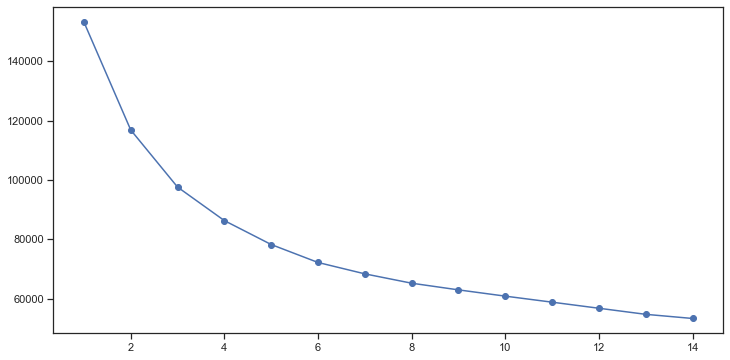

In [22]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [23]:
from sklearn.metrics import accuracy_score,silhouette_score,classification_report
for clusters in range(2,10):
    model =  KMeans(clusters)
    model.fit(df_2)
    sil_score = silhouette_score(df_2, model.labels_)
    print('silhouette_score for ', clusters, 'clusters : ', sil_score)
    #v = SilhouetteVisualizer(model)
    #v.fit(df_sc)
    plt.show()

silhouette_score for  2 clusters :  0.21024054491817512
silhouette_score for  3 clusters :  0.2069792424923517
silhouette_score for  4 clusters :  0.20167281542725338
silhouette_score for  5 clusters :  0.2134596360454452
silhouette_score for  6 clusters :  0.21097844331108853
silhouette_score for  7 clusters :  0.20898578457750805
silhouette_score for  8 clusters :  0.18875818137959643
silhouette_score for  9 clusters :  0.18538388782601903


In [24]:
#no of clusters= 2
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)

In [25]:
model=KMeans(n_clusters=2)
model.fit(df_2)

KMeans(n_clusters=2)

In [26]:
centroids = model.cluster_centers_
centroids

array([[ 7.89469021e-01,  8.00862192e-01,  4.41441479e-01,
         4.36641494e-01,  5.54187582e-01,  5.30151873e-01,
        -3.48859612e-01, -5.67635267e-01,  3.94404514e-01,
        -1.56014211e-01,  1.38639281e-01,  4.01155327e-03,
         3.70667522e-02,  2.02182285e-02,  1.39281130e-01,
         2.34756098e-01,  2.70057766e-01,  6.24197689e-02,
         4.87804878e-02,  9.09820282e-02,  1.95763800e-01,
         9.54749679e-02,  2.69576380e-02,  6.04942234e-02,
         6.49871630e-02,  3.75481386e-02,  4.05969191e-02,
         4.09178434e-01,  1.22111682e-01,  9.17843389e-02,
         2.79204108e-02,  3.43388960e-02,  4.49293967e-03,
         3.32156611e-02,  3.20924262e-03,  3.59435173e-02,
         1.60462131e-02, -7.18283939e-19,  3.94736842e-02,
         1.28369705e-03,  1.60462131e-03,  4.81386393e-04,
        -7.18283939e-19,  9.62772786e-04,  8.02310655e-04,
         1.34788190e-02,  4.97432606e-03,  8.18998716e-01,
         2.54492940e-01,  2.43581515e-01],
       [-8.06

In [27]:
centroid_df = pd.DataFrame(centroids, columns = list(df_2) )
centroid_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0.789469,0.800862,0.441441,0.436641,0.554188,0.530152,-0.348860,-0.567635,0.394405,-0.156014,...,0.001605,4.813864e-04,-7.182839e-19,0.000963,0.000802,0.013479,0.004974,0.818999,0.254493,0.243582
1,-0.806817,-0.818461,-0.451142,-0.446236,-0.566366,-0.541802,0.356526,0.580109,-0.403071,0.159443,...,0.004592,2.547875e-18,1.639882e-04,0.000656,0.001968,0.018695,0.008855,0.893244,0.210233,0.063955


In [28]:
model=KMeans(n_clusters=2)
model.fit(df_2)

KMeans(n_clusters=2)

In [29]:
df_k=df_2.copy()

In [30]:
df_k['label']=model.labels_

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Informational'>

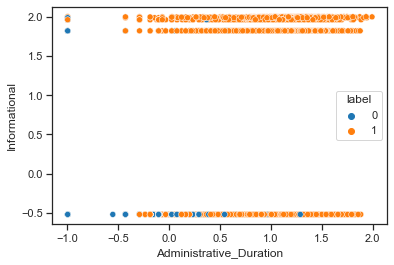

In [32]:
sns.scatterplot(x=df_k['Administrative_Duration'] ,y=df_k['Informational'],data=df_k, hue=df_k['label'],palette='tab10' )


# agglomarative

In [33]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans,AgglomerativeClustering

c=[2,3,4,5,6,7,8]
link=['average','complete','single','ward']
score=[]
for P in link:
    print('linkage: ',P)
    for n in c:
        cluster=AgglomerativeClustering(n_clusters=n,linkage=P)
        label=cluster.fit_predict(df_2)
        score=silhouette_score(df_2,label,random_state=10)
        print('the score of', n, 'is', score)
    print('\n')

linkage:  average
the score of 2 is 0.2540940205171516
the score of 3 is 0.22247492001486244
the score of 4 is 0.2024390781339177
the score of 5 is 0.19255216435365885
the score of 6 is 0.18040446291190396
the score of 7 is 0.17205238096395253
the score of 8 is 0.15660807856231884


linkage:  complete
the score of 2 is 0.1438926175738469
the score of 3 is 0.09646391969645761
the score of 4 is 0.05281734553402532
the score of 5 is 0.040336041798659045
the score of 6 is 0.046297127422235435
the score of 7 is 0.06849007204991435
the score of 8 is 0.057907195053162074


linkage:  single
the score of 2 is 0.19927841962643272
the score of 3 is 0.15753738830774874
the score of 4 is 0.14071252385341804
the score of 5 is 0.1107635216075769
the score of 6 is 0.10493457967355885
the score of 7 is 0.0865493910206803
the score of 8 is 0.07848082170946946


linkage:  ward
the score of 2 is 0.18646343426905368
the score of 3 is 0.18949171201665096
the score of 4 is 0.21404685889773684
the score of 5 

In [34]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

link = ['single', 'complete','average', 'ward']

for p in link:
    a = linkage(df_2, method = p)
    coph, coph_dist = cophenet(a, pdist(df_2))
    print('Cophenetic value for ', p , 'is: ', round(coph,4))

Cophenetic value for  single is:  0.5644
Cophenetic value for  complete is:  0.4629
Cophenetic value for  average is:  0.7179
Cophenetic value for  ward is:  0.588


In [35]:
hier=AgglomerativeClustering(n_clusters=2,linkage='ward')
label1=hier.fit_predict(df_2)

In [36]:
df_h=df_2.copy()
df_h['label']=label1

In [37]:
df_h.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True,label
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,0,1,0,0,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,...,0,0,0,0,0,0,1,0,0,1
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,...,0,0,0,0,0,0,1,0,0,1
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,...,0,0,0,0,0,0,1,0,0,1
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,...,0,0,0,0,0,0,1,1,0,1


In [38]:
y=df_1['Revenue']

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Informational'>

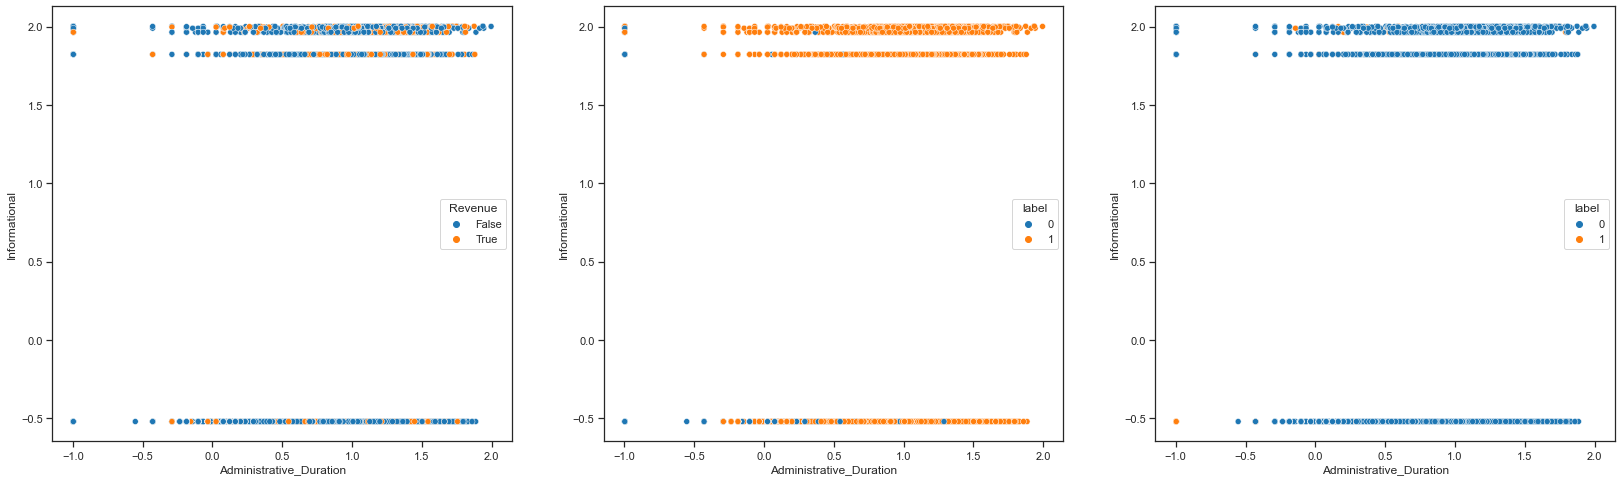

In [39]:
plt.figure(figsize=(28,8))
plt.subplot(1,3,1)
sns.scatterplot(x=df_2['Administrative_Duration'] , y=df_2['Informational'],data=df_2, hue=y, palette='tab10' )
plt.subplot(1,3,2)
sns.scatterplot(x=df_k['Administrative_Duration'] , y=df_k['Informational'],data=df_k, hue=df_k['label'], palette='tab10' )
plt.subplot(1,3,3)
sns.scatterplot(x=df_h['Administrative_Duration'] , y=df_h['Informational'],data=df_h, hue=df_h['label'], palette='tab10' )


# PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA()

In [42]:
pca_data=pca.fit(df_2)

In [43]:
eigen_values=pca.explained_variance_
eigen_values

array([4.31474226e+00, 1.59545106e+00, 1.15670580e+00, 1.06209436e+00,
       8.75712669e-01, 7.87960170e-01, 2.48970490e-01, 2.27352053e-01,
       1.97690415e-01, 1.78678454e-01, 1.66305383e-01, 1.64769137e-01,
       1.41507714e-01, 1.25523819e-01, 1.04335271e-01, 9.40837150e-02,
       8.55278080e-02, 7.91928222e-02, 7.26545937e-02, 6.92719545e-02,
       6.39880199e-02, 6.07204622e-02, 5.16790240e-02, 4.96838608e-02,
       4.66912501e-02, 4.31587435e-02, 4.05211283e-02, 3.85476729e-02,
       3.53371133e-02, 3.38899350e-02, 3.01929438e-02, 2.89613044e-02,
       2.51215305e-02, 2.35756685e-02, 2.17391552e-02, 1.91259412e-02,
       1.65324697e-02, 1.52186830e-02, 1.06647649e-02, 4.86105003e-03,
       3.50254340e-03, 3.28537512e-03, 3.15588057e-03, 2.95033368e-03,
       1.35857523e-03, 1.04285636e-03, 8.01971558e-04, 2.42007242e-04,
       8.09688001e-05, 8.09423120e-05])

In [44]:
pca.explained_variance_ratio_

array([3.47256192e-01, 1.28404022e-01, 9.30932201e-02, 8.54787658e-02,
       7.04785194e-02, 6.34160817e-02, 2.00374759e-02, 1.82975954e-02,
       1.59103873e-02, 1.43802794e-02, 1.33844782e-02, 1.32608391e-02,
       1.13887289e-02, 1.01023238e-02, 8.39704126e-03, 7.57198242e-03,
       6.88339166e-03, 6.37354358e-03, 5.84733826e-03, 5.57509896e-03,
       5.14984088e-03, 4.88686349e-03, 4.15919653e-03, 3.99862315e-03,
       3.75777386e-03, 3.47347303e-03, 3.26119426e-03, 3.10236794e-03,
       2.84397784e-03, 2.72750701e-03, 2.42996824e-03, 2.33084427e-03,
       2.02181416e-03, 1.89740114e-03, 1.74959610e-03, 1.53928117e-03,
       1.33055513e-03, 1.22481983e-03, 8.58314456e-04, 3.91223767e-04,
       2.81889348e-04, 2.64411356e-04, 2.53989462e-04, 2.37446775e-04,
       1.09339940e-04, 8.39304662e-05, 6.45437368e-05, 1.94770645e-05,
       6.51647664e-06, 6.51434484e-06])

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34725619, 0.47566021, 0.56875343, 0.6542322 , 0.72471072,
       0.7881268 , 0.80816428, 0.82646187, 0.84237226, 0.85675254,
       0.87013702, 0.88339786, 0.89478658, 0.90488891, 0.91328595,
       0.92085793, 0.92774132, 0.93411487, 0.93996221, 0.9455373 ,
       0.95068715, 0.95557401, 0.95973321, 0.96373183, 0.9674896 ,
       0.97096308, 0.97422427, 0.97732664, 0.98017062, 0.98289812,
       0.98532809, 0.98765894, 0.98968075, 0.99157815, 0.99332775,
       0.99486703, 0.99619758, 0.9974224 , 0.99828072, 0.99867194,
       0.99895383, 0.99921824, 0.99947223, 0.99970968, 0.99981902,
       0.99990295, 0.99996749, 0.99998697, 0.99999349, 1.        ])

In [46]:
pca=PCA(n_components=10)

In [47]:
model=PCA(n_components=12)
X_pca=pd.DataFrame(model.fit_transform(df_2), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [48]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.945367,1.395242,-1.295577,0.287776,-0.696746,0.140240,0.154483,-0.286077,0.006021,-0.248863,-0.111453,-0.042943
1,-2.471244,-0.188725,-0.618490,-0.885850,0.397016,0.631229,0.149683,1.332547,0.580673,0.114556,-0.242423,-0.221273
2,-3.974744,1.405412,-1.287004,0.310797,-0.692483,0.128186,-0.131044,-0.285871,-0.253561,-0.465977,-0.099646,0.089681
3,-3.548614,1.090961,-1.012143,0.123062,-0.562925,0.130579,-0.134196,-0.225522,0.026648,-0.072703,-0.289562,-0.246537
4,-1.741292,0.094276,0.306819,-0.486096,-0.600809,-0.550119,-0.255740,-0.234991,-0.013249,0.829866,-0.179174,0.108591


In [49]:
kmeans=KMeans(n_clusters=2)
label_2=kmeans.fit_predict(X_pca)
df_k2=X_pca.copy()
df_k2['label']=label_2
df_k2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,label
0,-3.945367,1.395242,-1.295577,0.287776,-0.696746,0.140240,0.154483,-0.286077,0.006021,-0.248863,-0.111453,-0.042943,1
1,-2.471244,-0.188725,-0.618490,-0.885850,0.397016,0.631229,0.149683,1.332547,0.580673,0.114556,-0.242423,-0.221273,1
2,-3.974744,1.405412,-1.287004,0.310797,-0.692483,0.128186,-0.131044,-0.285871,-0.253561,-0.465977,-0.099646,0.089681,1
3,-3.548614,1.090961,-1.012143,0.123062,-0.562925,0.130579,-0.134196,-0.225522,0.026648,-0.072703,-0.289562,-0.246537,1
4,-1.741292,0.094276,0.306819,-0.486096,-0.600809,-0.550119,-0.255740,-0.234991,-0.013249,0.829866,-0.179174,0.108591,1


In [50]:
print('Original Data Classes:')
print(df_1.Revenue.value_counts())
print('Predicted Data Classes:')
print(df_k2['label'].value_counts())

Original Data Classes:
False    10422
True      1908
Name: Revenue, dtype: int64
Predicted Data Classes:
0    6189
1    6141
Name: label, dtype: int64


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

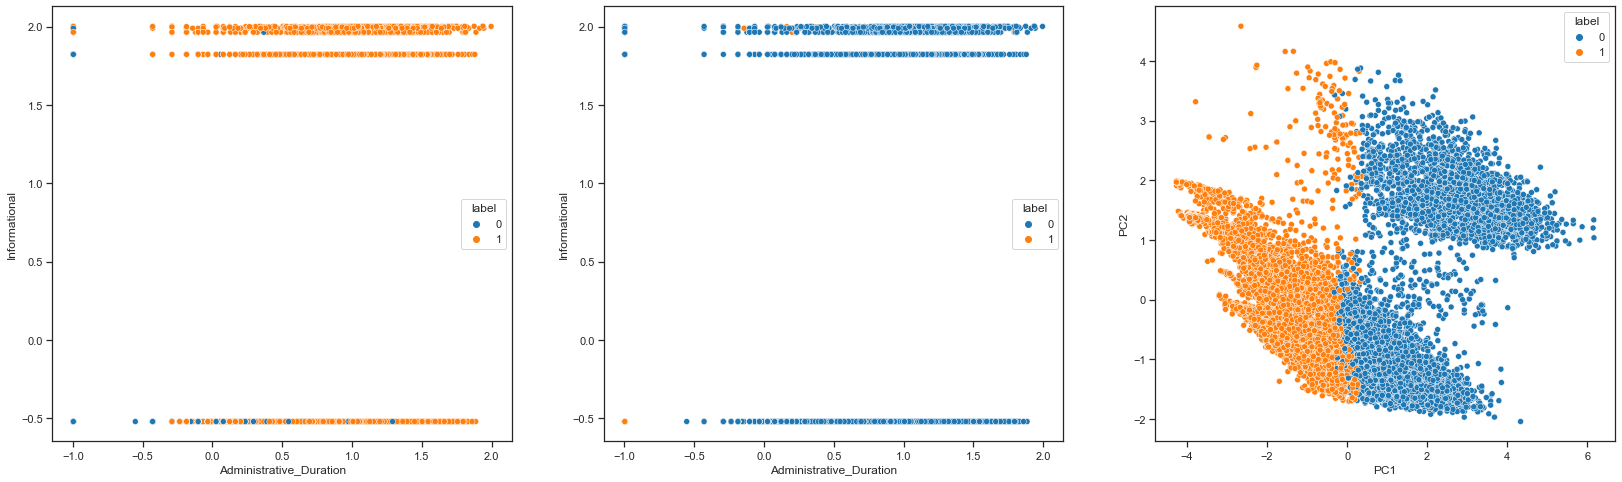

In [51]:
plt.figure(figsize=(28,8))
plt.subplot(1,3,1)
sns.scatterplot(x=df_k['Administrative_Duration'] , y=df_k['Informational'],data=df_k, hue=df_k['label'], palette='tab10' )
plt.subplot(1,3,2)
sns.scatterplot(x=df_h['Administrative_Duration'] , y=df_h['Informational'],data=df_h, hue=df_h['label'], palette='tab10' )
plt.subplot(1,3,3)
sns.scatterplot(x=df_k2['PC1'] , y=df_k2['PC2'],data=df_k2, hue=df_k2['label'], palette='tab10' )

In [52]:
from sklearn.model_selection import  train_test_split

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
X=df_2
y=df_on.Revenue
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2089
        True       1.00      1.00      1.00       377

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



In [60]:
X=df_2
y=df_k.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1226
           1       0.96      0.96      0.96      1240

    accuracy                           0.96      2466
   macro avg       0.96      0.96      0.96      2466
weighted avg       0.96      0.96      0.96      2466



In [61]:
X=df_2
y=df_k2.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100)
dt=dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1224
           1       0.97      0.96      0.96      1242

    accuracy                           0.96      2466
   macro avg       0.96      0.96      0.96      2466
weighted avg       0.96      0.96      0.96      2466



In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
X=df_2
y=df_k2.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1224
           1       1.00      0.99      1.00      1242

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



In [65]:
X=df_2
y=df_k2.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1224
           1       1.00      0.99      1.00      1242

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

